In [ ]:
pip list

In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
import os

In [2]:
os.path.join('data','happy')

'data\\happy'

In [3]:
os.listdir('data')

['happy', 'sad']

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [6]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data'

In [9]:
image_exts = ['jpeg', 'jpg', 'bmp','png']

In [10]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [11]:
os.listdir('data')

['happy', 'sad']

In [12]:
os.listdir(os.path.join(data_dir,'happy')) #check all the images in happy folder

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [13]:
for image_class in os.listdir(data_dir): #looping through every folder 
    for image in os.listdir(os.path.join(data_dir,image_class)): #data , happy 'then' data , sad, joining the path print image in every sub directory 
        image_path = os.path.join(data_dir,image_class,image)  #grabbing every simgle image
        try:
            img = cv2.imgread(image_path) #opens up an image 
            tip = imghdr.what(image_path) #check file extension 
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path)) 
                os.remove(image_path) #remove the image if its not suitable
        except  Exception as e:
            print("Issuse with the image{}".format(image_path))
        

Issuse with the imagedata\happy\05-12-21-happy-people.jpg
Issuse with the imagedata\happy\07-120104-happy_people_are_not_nice_people.jpg
Issuse with the imagedata\happy\1-2.jpg
Issuse with the imagedata\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issuse with the imagedata\happy\11-Habits-of-Truly-Happy-People.jpg
Issuse with the imagedata\happy\154006829.jpg
Issuse with the imagedata\happy\170404-happy-workers-feature.jpg
Issuse with the imagedata\happy\1902539.jpg
Issuse with the imagedata\happy\1902540.jpg
Issuse with the imagedata\happy\1902587.jpg
Issuse with the imagedata\happy\1920px-face-smile.svg_.png.jpg
Issuse with the imagedata\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issuse with the imagedata\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issuse with the imagedata\happy\60632274._UY200_.jpg
Issuse with the imagedata\happy\7-Habits-of-Happy-People-image.jpeg
Issuse with the imagedata\happy\7-principles-of-successful-and-happy-people.png
Issuse with 

In [14]:
# tf.data.Dataset??

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')#allows make pipeline does preprocessing ,resize also , also help build classes

Found 305 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()
#access data pipeline

In [18]:
batch = data_iterator.next()

In [19]:
batch[0].shape
#IMages represented as numpy arrays

(32, 256, 256, 3)

In [20]:
batch[1]
#class 1 = sad class 0 = happy 

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

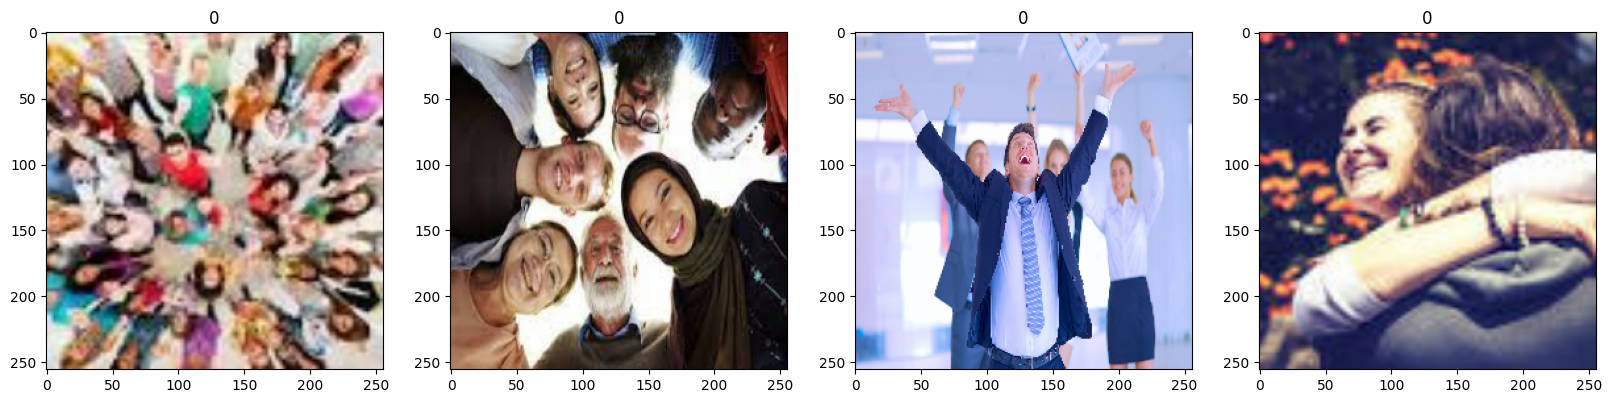

In [21]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20)) #subplot is from matplotlib
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing

In [22]:
#Scale Data
data = data.map(lambda x,y: (x/255,y)) 
#used to do transformation 

In [23]:
data.as_numpy_iterator().next()

(array([[[[1.88526347e-01, 2.23820463e-01, 1.17938116e-01],
          [1.96951598e-01, 2.32682288e-01, 1.26799941e-01],
          [2.06104472e-01, 2.45320156e-01, 1.39437810e-01],
          ...,
          [9.56295967e-01, 8.19485307e-01, 6.85585201e-01],
          [9.55989599e-01, 8.11328113e-01, 6.42271757e-01],
          [9.56862748e-01, 8.11764717e-01, 6.39215708e-01]],
 
         [[1.90770522e-01, 2.26064637e-01, 1.20182291e-01],
          [1.99195772e-01, 2.34926477e-01, 1.29044116e-01],
          [2.08348647e-01, 2.47564346e-01, 1.41681984e-01],
          ...,
          [9.60946500e-01, 8.27791393e-01, 6.96551859e-01],
          [9.60727751e-01, 8.20554674e-01, 6.55736804e-01],
          [9.61351097e-01, 8.20741415e-01, 6.57002509e-01]],
 
         [[1.93573833e-01, 2.29993880e-01, 1.26363352e-01],
          [2.02124432e-01, 2.38855705e-01, 1.35225177e-01],
          [2.12277874e-01, 2.51493573e-01, 1.47863045e-01],
          ...,
          [9.67881620e-01, 8.40209842e-01, 7.1462

In [24]:
batch[0].shape

(32, 256, 256, 3)

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
len(test)

1

# Deep Model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [56]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))



In [57]:
model.compile('adam' , loss = tf.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [58]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 16) 
# going into flatten layer 
# 30*30*16

In [67]:
logdir = 'logs'

In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [70]:
hist = model.fit(train,epochs = 20,validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 857ms/step - accuracy: 0.5088 - loss: 1.3179 - val_accuracy: 0.5938 - val_loss: 0.6540
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 506ms/step - accuracy: 0.5738 - loss: 0.6654 - val_accuracy: 0.8125 - val_loss: 0.6157
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 530ms/step - accuracy: 0.7210 - loss: 0.5928 - val_accuracy: 0.7344 - val_loss: 0.5666
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 526ms/step - accuracy: 0.8142 - loss: 0.4760 - val_accuracy: 0.7969 - val_loss: 0.3753
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 507ms/step - accuracy: 0.7988 - loss: 0.4361 - val_accuracy: 0.7969 - val_loss: 0.4051
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 509ms/step - accuracy: 0.8454 - loss: 0.3383 - val_accuracy: 0.8125 - val_loss: 0.4330
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 542ms/step - accuracy: 0.8907 - loss: 0.3068 - val_accuracy: 0.9531 - val_loss: 0.2184
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 536ms/step - accuracy: 0.9260 - loss: 0.2596 - val_accuracy: 0.9531 - val_loss

Plot Performance

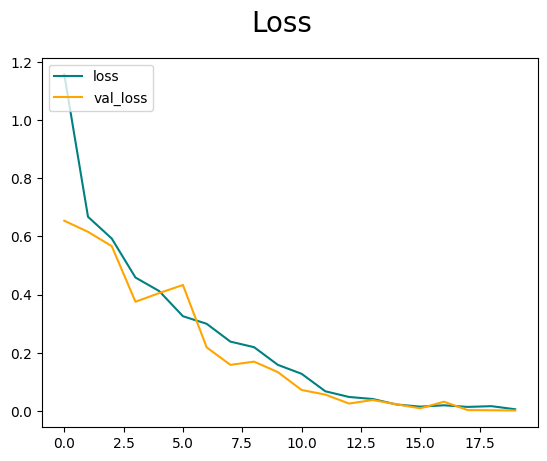

In [76]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange' , label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

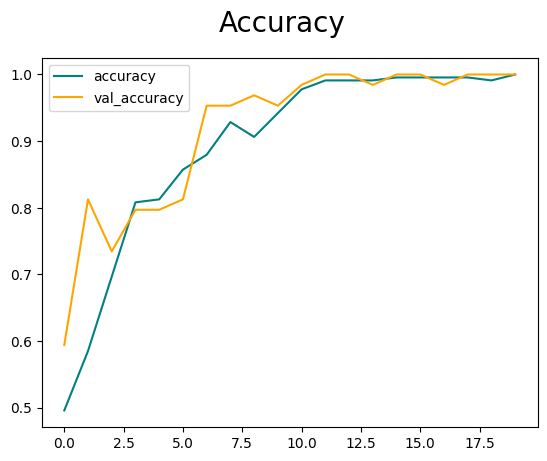

In [77]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal' , label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange' , label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

Evalute Performance

In [81]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [82]:
pre = Precision()
re  = Recall()
acc = BinaryAccuracy()

In [83]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


In [85]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [86]:
import cv2

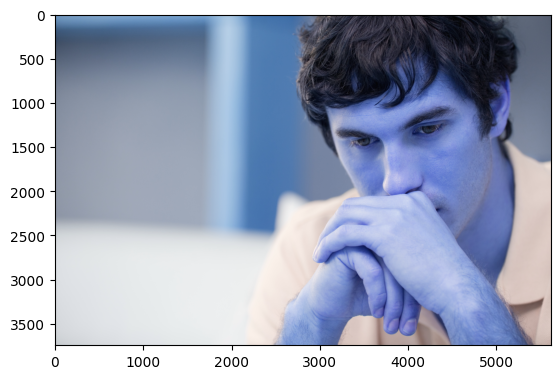

In [96]:
img = cv2.imread('sad.jpg')
plt.imshow(img)
plt.show()

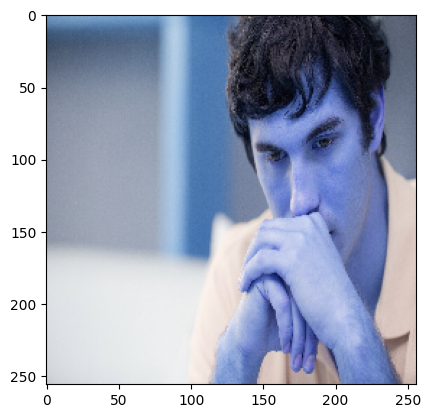

In [97]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [98]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [99]:
yhat

array([[0.9979883]], dtype=float32)

In [100]:
if yhat > 0.5:
    print("The Predicited class is sad")
else:
    print("The Predicted class is happy")

The Predicited class is sad


save the model in .h5


In [101]:
from tensorflow.keras.models import load_model

In [102]:
model.save(os.path.join('models','imgclassificationmodel.h5'))

In [104]:
new_model = load_model(os.path.join('models','imgclassificationmodel.h5'))

In [105]:
new_model

<Sequential name=sequential_6, built=True>